The goal of this notebook is to follow the openCV tutorial about AruCo Markers:

https://docs.opencv.org/trunk/d5/dae/tutorial_aruco_detection.html

Camera Calibration: https://nikatsanka.github.io/camera-calibration-using-opencv-and-python.html

Some additional helpful links:
* [openCV AruCo API](https://docs.opencv.org/4.2.0/d9/d6a/group__aruco.html#gac84398a9ed9dd01306592dd616c2c975)
* [learnOpenCV tutorial](https://www.learnopencv.com/augmented-reality-using-aruco-markers-in-opencv-c-python/?ck_subscriber_id=491230052)


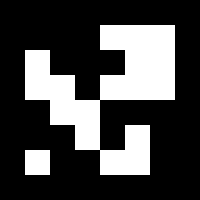

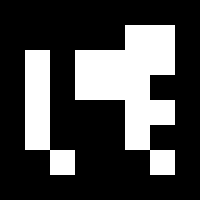

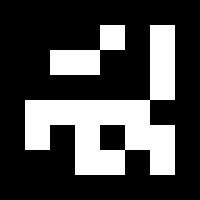

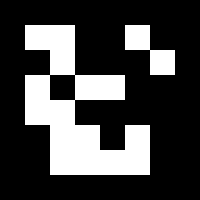

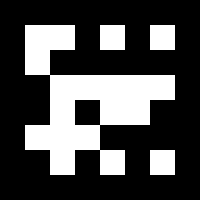

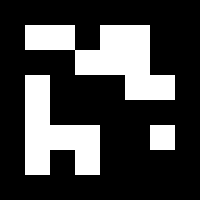

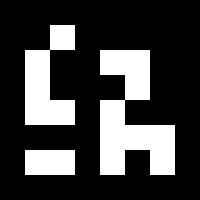

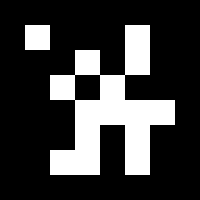

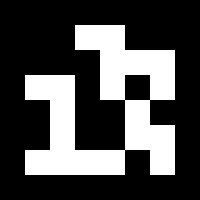

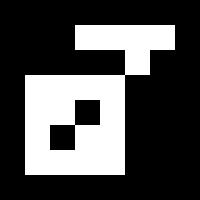

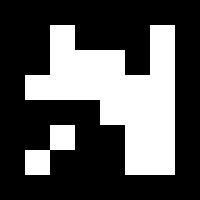

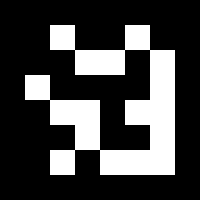

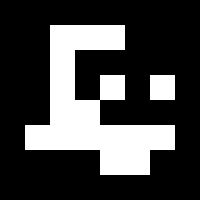

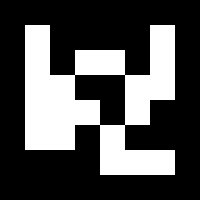

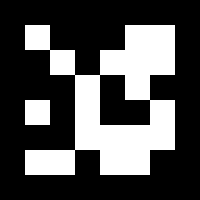

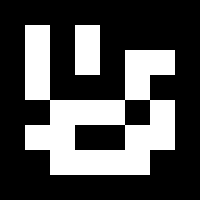

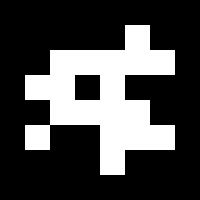

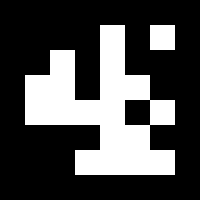

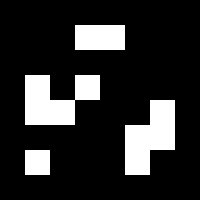

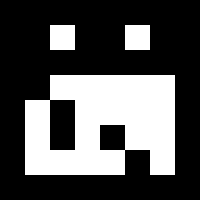

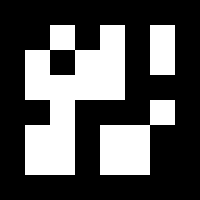

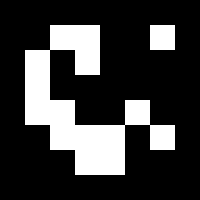

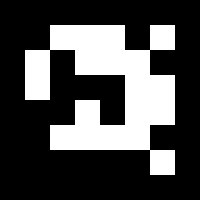

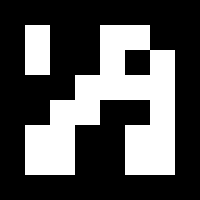

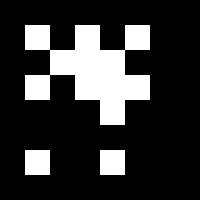

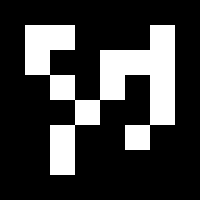

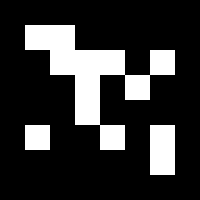

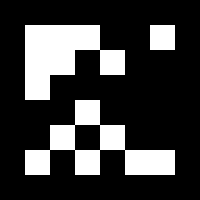

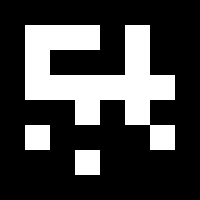

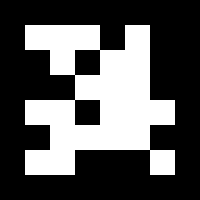

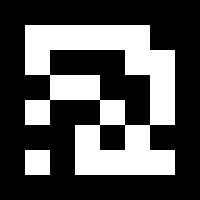

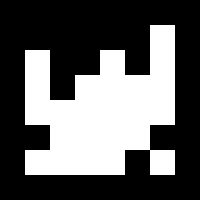

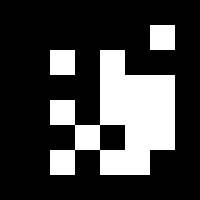

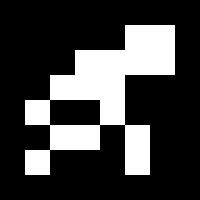

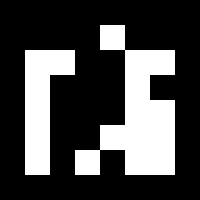

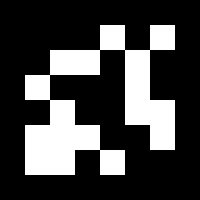

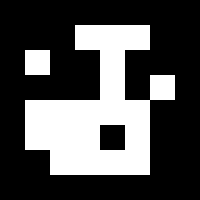

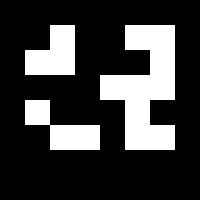

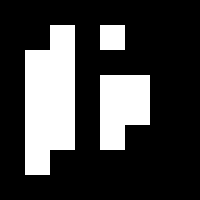

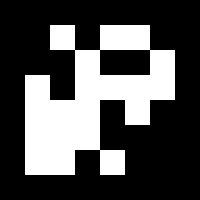

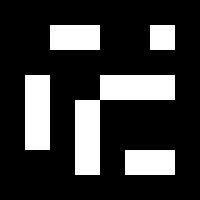

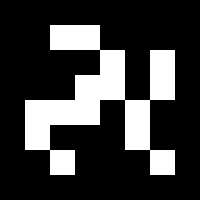

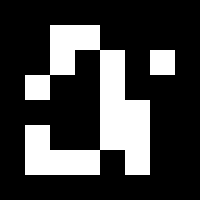

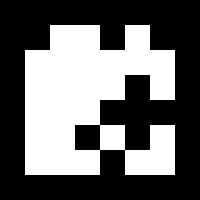

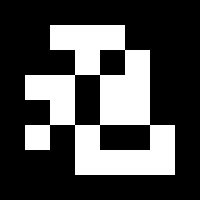

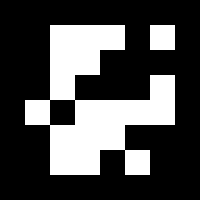

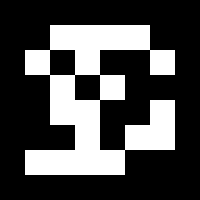

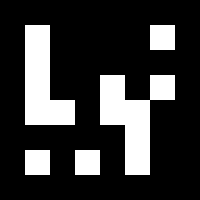

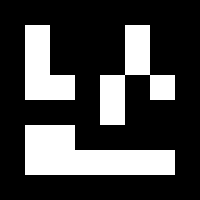

In [8]:
import cv2 as cv
import numpy as np
from IPython.display import Image, display

# Load the predefined dictionary
dictionary = cv.aruco.Dictionary_get(cv.aruco.DICT_6X6_50)

# Generate the marker
markerImage = np.zeros((200, 200), dtype=np.uint8)
f = open("markers.html","w")

for i in range(0,49):
    markerImage = cv.aruco.drawMarker(dictionary, i, 200, markerImage, 1);
    cv.imwrite("marker"+str(i)+".png", markerImage);
    display(Image(filename="marker"+str(i)+".png"));
    f.write("<img src='marker"+str(i)+".png'/> ")
    
f.close()

In [11]:
#aquire a camera image
from picamera import PiCamera
from zumi.util.screen import Screen
import time

camera = PiCamera()

try:
    screen = Screen()
    camera.rotation = 180
    #camera.set_resolution()
    #camera.set_resolution()
    #camera.resolution = (1024,768)
    camera.resolution = (640,480)

    for i in range(0,50):    
        print("picture "+str(i))
        screen.draw_text("picture "+str(i))
        camera.capture("calib"+str(i)+".jpg")
        #display(Image(filename="test.jpg"))

#    display(Image(filename="test.jpg"))        
finally:
    camera.close()

picture 0
picture 1
picture 2
picture 3
picture 4
picture 5
picture 6
picture 7
picture 8
picture 9
picture 10
picture 11
picture 12
picture 13
picture 14
picture 15
picture 16
picture 17
picture 18
picture 19
picture 20
picture 21
picture 22
picture 23
picture 24
picture 25
picture 26
picture 27
picture 28
picture 29
picture 30
picture 31
picture 32
picture 33
picture 34
picture 35
picture 36
picture 37
picture 38
picture 39
picture 40
picture 41
picture 42
picture 43
picture 44
picture 45
picture 46
picture 47
picture 48
picture 49


In [31]:
#Load the dictionary that was used to generate the markers.
dictionary = cv.aruco.Dictionary_get(cv.aruco.DICT_6X6_250)

# Initialize the detector parameters using default values
parameters =  cv.aruco.DetectorParameters_create()

frame = cv.imread("test.jpg")
#display(Image(filename="IMG_20200325_223608.jpg"));
# Detect the markers in the image
markerCorners, markerIds, rejectedCandidates = cv.aruco.detectMarkers(frame, dictionary, parameters=parameters)

display(markerIds)
display(markerCorners)

array([[62]], dtype=int32)

[array([[[200., 147.],
         [198.,  65.],
         [280.,  63.],
         [284., 146.]]], dtype=float32)]

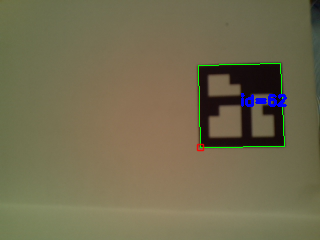

In [32]:
cv.aruco.drawDetectedMarkers(frame, markerCorners, markerIds)
cv.imwrite("result.png",frame)
display(Image(filename="result.png"))

array([200., 147.], dtype=float32)

array([198.,  65.], dtype=float32)

array([280.,  63.], dtype=float32)

array([284., 146.], dtype=float32)

240

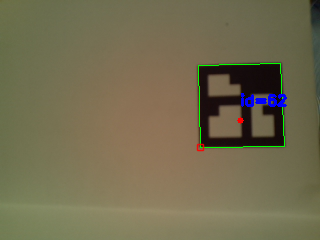

In [33]:
xsum = 0
for corner in markerCorners[0][0]:
    display(corner)
    xsum+=corner[0]
xmid = int(xsum/4)
display(xmid)
cv.circle(frame,(xmid,120), 3, (0,0,255), -1)
cv.imwrite("result.png",frame)
display(Image(filename="result.png"))